#### [CNN CUSTOM DATASET + MODEL]

- 사용자 정의 이미지 데이터셋 생성 => ImageFolder
- 사용자 정의 CNN 기반 모델
- 데이터 : 강아지, 고양이 사진

[1] 모듈 로딩 및 데이터 준비 <hr>

In [9]:
## 모듈 로딩
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision.datasets import ImageFolder			## 이미지용 데이터셋 생성 모듈		
from torch.utils.data import DataLoader					## 데이터로더
from torchvision.transforms import transforms			## 이미지 전처리 및 증강 모듈

import matplotlib.pyplot as plt							## 이미지 시각화

In [ ]:
## 데이터 분리
IMG_ROOT = '../data/image/cat_dog/'

[2] 데이터 로딩 및 데이터셋 준비 <hr>

In [17]:
## [2-0] 이미지 전처리 및 변형
## - resize   => 이미지 크기 통일			==> transforms.Resize((shape))
## - tensor화 => Pytorch 모델 입력 타입 변환 ==> transforms.ToTensor() : 텐서화 + 정규화(0.~1.)
preprocessing = transforms.Compose(
	{
		transforms.Resize((100, 100)),
		transforms.ToTensor()
	}
)

In [18]:
## [2-1] 이미지 데이터 로딩
imgDS = ImageFolder(root=IMG_ROOT,
					transform=preprocessing)

In [ ]:
## 이미지 데이터셋 확인
print(f'classes		 => {imgDS.classes}')
print(f'class_to_idx => {imgDS.class_to_idx}')
print(f'targets		 => {imgDS.targets}')
print(f'imgs		 => {imgDS.imgs}')

classes		 => ['cat', 'dog']
class_to_idx => {'cat': 0, 'dog': 1}
targets		 => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
imgs		 => [('../data/image/cat_dog/cat\\cat_(1).jpg', 0), ('../data/image/cat_dog/cat\\cat_(10).jpg', 0), ('../data/image/cat_dog/cat\\cat_(11).jpg', 0), ('../data/image/cat_dog/cat\\cat_(12).jpg', 0), ('../data/image/cat_dog/cat\\cat_(13).jpg', 0), ('../data/image/cat_dog/cat\\cat_(14).jpg', 0), ('../data/image/cat_dog/cat\\cat_(15).jpg', 0), ('../data/image/cat_dog/cat\\cat_(16).jpg', 0), ('../data/image/cat_dog/cat\\cat_(17).jpg', 0), ('../data/image/cat_dog/cat\\cat_(18).jpg', 0), ('

<class 'torch.Tensor'> tensor(0.0139) tensor(1.)


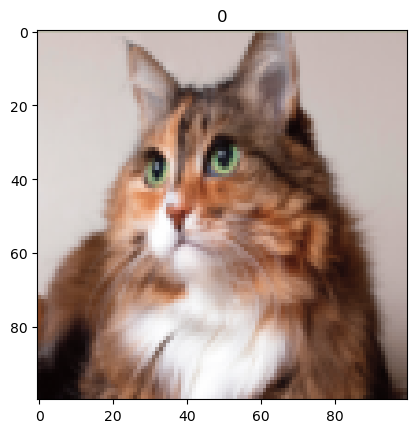

In [23]:
## 내부적으로 __getitem()__ 호출되면서 이미지 데이터와 타겟 반환
rawImg, target = imgDS[0]
print(type(rawImg), rawImg.min(), rawImg.max())

plt.imshow(rawImg.permute(1,2,0))
plt.title(target)
plt.show()

In [25]:
## [2-2] 데이터로더
from PIL import Image

imgDL = DataLoader(imgDS)
for img, target in imgDL:
	print(img.shape, target)
	break

torch.Size([1, 3, 100, 100]) tensor([0])
